# プロジェクト

配点
- Q1 50P
- Q2 50P

In [61]:
import pandas as pd
import numpy as  np
import csv
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot  as plt
%matplotlib inline

# 必要なモジュールがあれば適宜追加してください

## Q1
UCI Machine Learning Repositoryに公開されているワインの品質データセットを用いて、ワインの理化学検査結果に基づく特徴量からワインの品質を予測することを考えます。

以下では***白ワイン***のデータセットを使用します。（赤ワインのデータセットではないことに注意してください）

[Wine Quality Data Set ](https://archive.ics.uci.edu/ml/datasets/wine+quality)

各ワインのデータは以下の11種類の特徴量からなります。
- 1 - fixed acidity 
- 2 - volatile acidity 
- 3 - citric acid 
- 4 - residual sugar 
- 5 - chlorides 
- 6 - free sulfur dioxide 
- 7 - total sulfur dioxide 
- 8 - density 
- 9 - pH 
- 10 - sulphates 
- 11 - alcohol 

また、各ワインには0から10の品質スコアが付与さています。11種類の特徴量を元にワインの品質を高品質（ワインのqualityが6以上）、低品質（ワインのqualityが6未満）の2値にして予測する2クラス分類問題を考えます。

データ分析の実践のノートブック（practical_ds.ipynb）を参考に、以下に従ってワインの品質を2クラス分類として予測するモデルの学習と評価を行う一連のコードを実装しその実行結果を表示した上で、以下の各Qについて考察を記述してください。その他に工夫した点があればそれについても記述をしてください。授業で学んだ内容を元に適切に分析を行っているか、独自の創意工夫があるか、を主に評価します。

- データの観察・前処理
    - ***Q. それぞれの特徴量の記述統計量、ばらつき・分布はどのようになっているでしょうか***（3P）
    - ***Q. 欠損値、外れ値、重複データの処理は必要でしょうか***（3P）
    - ***Q. 特徴量間の相関はどのようになっているでしょうか***（3P）

- モデルの学習
    - データセットを訓練データとテストデータに分けます。テストデータは最終的に選択したモデルの評価に使います。訓練データは交差検証に使いモデルの選択と評価を行います。
    - ワインの品質を2クラス分類として予測するためのモデルとしてロジスティック回帰を考えます
    - 単純な特徴量を元に、モデルの基本となる精度を確認しましょう
         - ***Q. 単純なモデルとしてどのような特徴量を使うのがよいでしょうか***（3P）
         - ***Q. どのような評価尺度を使うのがよいでしょうか***（3P）
             - accuracy, precision, recall, f値など
         - ***Q. 単純なモデルではどの程度の精度が期待できるでしょうか***（5P）
- モデルの選択と評価
    - モデルを複雑にして精度を向上させることを考えます
         - ***Q. どのような特徴量を作成・選択すればよいでしょうか***（5P）
             - 特徴量作成：非線形変換、交差項、多項式、ドメイン知識の利用など
             - 特徴量選択：探索、相関・情報量、モデルベースなど
         - 訓練データを交差検証に使い、モデルを評価し選択をしましょう（10P）
            - ***Q. どのような評価尺度を使うのがよいでしょうか***
                - accuracy, precision, recall, f値など
            - ***Q. どのようなモデルを選択しましたか。単純なモデルに比べてどれぐらい精度が向上したでしょうか。どのような要因で精度が向上したのでしょうか*** 
    - モデルの複雑性は適切でしょうか（5P）
        - ***Q. アンダーフィッティング（High Bias）やオーバーフィッティング（High Variance）になっていないか確認しましょう***
        - ***Q. もしHigh BiasやHigh Varianceの場合はどのように対処すればよいでしょうか***
    - 最終的に選択したモデルをテストデータで評価しましょう（10P）
        - ***Q. 選択したモデルではどの程度の精度が期待できるでしょうか***
        - ***Q. 今回のモデルを実際にワイン工場で品質予測システムとして実展開するにはどのようなことを検討する必要があるでしょうか***
        
***上記は分類問題のため、モデルの評価は平均二乗誤差ではなく交差エントロピー誤差、またはaccuracy, precision, recall, f値などを用いることに注意してください。***

比較のためにその他のモデル（ランダムフォレスト、SVM、ニューラルネットワークなど）を使ってもらってもよいですが、それだけを持って大きく加点することはありません

コードセルや説明用のマークダウンセルは必要な分だけ追加してください。マークダウンセルに記述する際は以下の記法を参考にしてください。

[マークダウンセルの記法](https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#4.-Using-Markdown-Cells-for-Writing)

In [62]:
# 白ワインデータセットの読み込み
wine = pd.read_csv("winequality-white.csv", sep=";")

In [63]:
# 特徴量
X=wine[ ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

# 正解ラベルを1（高品質：ワインのqualityが6以上）か0（低品質：ワインのqualityが6未満）とする
y=wine['quality'].values
y = (y>=6).astype(np.int) 
print(np.sum(y==1, axis=0)) # 高品質ワインデータの数
print(np.sum(y==0, axis=0)) # 低品質ワインデータの数

3258
1640


### 参考
すべての特徴量を使ってロジスティック回帰によりワイン品質の分類をしてみます

In [65]:
# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y) 

# 標準化
sc = StandardScaler()
sc.fit(X_train)
norm_X_train =  sc.transform(X_train)
norm_X_test =  sc.transform(X_test)

# ロジスティック回帰モデル
lr=LogisticRegression(solver='liblinear',  multi_class='ovr') 
# model=LogisticRegression() # sklearn0.19以前の場合

lr.fit(norm_X_train, y_train)    
y_pred = lr.predict(norm_X_test)

print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f値

# 特徴量ごとのパラメータ重み
pd.DataFrame(lr.coef_, index=['weight'], columns=wine.drop("quality", axis=1).columns.values)

[[ 82  82]
 [ 27 299]]
0.7775510204081633
0.7847769028871391
0.9171779141104295
0.8458274398868458


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
weight,0.014036,-0.630922,-0.000317,0.751775,0.016366,0.173107,-0.063563,-0.682431,0.128577,0.188286,0.9297


多項式による特徴量作成と正則化を元にモデル選択と評価をしてみます。 `LogisticRegression()`の引数`C`の値の逆数が正則化項の係数になることに注意してください。

[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

以下では、`cross_validate`を用いて複数の評価尺度（precision, recall, f1)で交差検証をしています。

[cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

In [66]:
degree=[1,2,3]
C=[10, 1, 0.1]
for n in degree:
    for r in C:
        pipe = make_pipeline(PolynomialFeatures(degree=n), StandardScaler(), LogisticRegression(solver='liblinear',  multi_class='ovr', C=r))
        scores=cross_validate(pipe, X_train, y_train, cv=10, scoring=('precision', 'recall', 'f1'),return_train_score=True)
        print(n, r, scores['test_precision'].mean(), scores['test_recall'].mean(), scores['test_f1'].mean())

1 10 0.7725666325171728 0.8772422279492001 0.8213039107093701
1 1 0.7730323362253124 0.8772422279492001 0.8215654682226837
1 0.1 0.772885389910934 0.8789475517169325 0.822248883009407
2 10 0.793406948153882 0.8649636646467462 0.8273543720406247
2 1 0.7931041044987663 0.8673504213972277 0.8283136090138633
2 0.1 0.7854310451953606 0.8697406607694272 0.8251508524944015
3 10 0.8016430780654307 0.8564242761951195 0.8279387756448578
3 1 0.800363822067097 0.8632502147616726 0.8304493884979516
3 0.1 0.7953480780617727 0.8687098047410089 0.8302110405455027


交差検証の結果から、多項式の次数を3、正則化のハイパーパラメータを1としたモデルを採用してテストデータで評価してみます。すべての特徴量を使用した先ほどのモデルと比べてprecisionは0.78から0.84に向上しました。一方、recallは0.91から0.90に減少しました。F値（f1）は0.84から0.87に向上しました。

In [67]:
# 多項式
poly=PolynomialFeatures(degree=3, include_bias=False)
poly_X_train=poly.fit_transform(X_train)
poly_X_test=poly.transform(X_test)

# 標準化
sc = StandardScaler()
norm_X_train =  sc.fit_transform(poly_X_train)
norm_X_test =  sc.transform(poly_X_test)

# ロジスティック回帰モデル
lr = LogisticRegression(solver='liblinear',  multi_class='ovr', C=1) 

lr.fit(norm_X_train, y_train)     
y_pred = lr.predict(norm_X_test)

print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f値

[[109  55]
 [ 30 296]]
0.826530612244898
0.8433048433048433
0.9079754601226994
0.8744460856720828


このモデルのprecision-recall曲線は以下のようになります。

[precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)

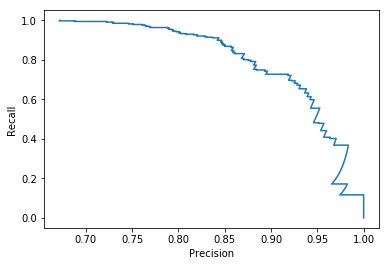

In [68]:
y_pred_proba=lr.predict_proba(norm_X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall');

## Q2
2019年度版のSSDSE（教育用標準データセット）のデータを元に、自分で仮説を設定した上で、その仮説を回帰、分類やクラスタリングの問題として設計し、その分析のためのコードと結果および考察を報告してください。

SSDSE-2019A, SSDSE-2019Bのいずれかのデータセット利用あるいは両方のデータセットを組み合わせて利用でも構いません。授業で学んだ内容を元に適切に分析を行っているか、独自の創意工夫があるか、を主に評価します。

[2019年度版SSDSE（教育用標準データセット）](https://www.nstac.go.jp/SSDSE/)

[SSDSEの解説](https://www.nstac.go.jp/SSDSE/data/kaisetsu-2019.pdf)

[分析の例](https://www.nstac.go.jp/statcompe/past-award-2018.html)

コードセルや説明用のマークダウンセルは必要な分だけ追加してください。マークダウンセルに記述する際は以下の記法を参考にしてください。

[マークダウンセルの記法](https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#4.-Using-Markdown-Cells-for-Writing)

In [58]:
# SSDSE-2019A（市区町村データ） 2,3行目（日本語ヘッダ）は読み飛ばしています
df = pd.read_csv('SSDSE-2019A.csv',  skiprows=[1,2])
df.head(10)

,Code,Prefecture,Municipality,A1101,A110101,A110102,A1102,A110201,A110202,A1301,...,H6131,H6132,I510120,I5102,I5103,I6100,I6200,I6300,J2503,J2506
0,R01100,北海道,札幌市,1952356,910614,1041742,1937785,903535,1034250,221013,...,8502,355,178,1329,1232,6614,2113,5398,273,25742
1,R01202,北海道,函館市,265979,120376,145603,264537,119819,144718,27131,...,1749,41,28,216,131,801,183,680,47,3438
2,R01203,北海道,小樽市,121924,54985,66939,121415,54722,66693,11171,...,778,17,12,84,79,322,102,326,21,1350
3,R01204,北海道,旭川市,339605,156402,183203,335678,154716,180962,37173,...,1743,65,36,242,177,1339,254,867,61,5290
4,R01205,北海道,室蘭市,88564,43143,45421,88203,42935,45268,9185,...,621,11,6,55,45,272,63,196,10,1017
5,R01206,北海道,釧路市,174742,82185,92557,174120,81942,92178,19400,...,1151,29,15,83,94,357,107,347,27,1846
6,R01207,北海道,帯広市,169327,80994,88333,168800,80736,88064,20566,...,1378,32,18,102,99,493,138,395,26,2626
7,R01208,北海道,北見市,121226,58020,63206,120936,57884,63052,13570,...,663,28,12,65,53,226,79,212,25,1510
8,R01209,北海道,夕張市,8843,4092,4751,8755,4089,4666,500,...,40,0,0,7,6,10,9,15,3,64
9,R01210,北海道,岩見沢市,84499,39319,45180,84215,39201,45014,8983,...,381,10,5,59,51,182,63,137,13,1028


In [60]:
# SSDSE-2019B（都道府県・時系列データ） 2行目（日本語ヘッダ）は読み飛ばしています
df = pd.read_csv('SSDSE-2019B.csv',  skiprows=[1])
df.head(10)

,Year,Code,Prefecture,A1101,A110101,A110102,A1102,A110201,A110202,A1301,...,L322101,L322102,L322103,L322104,L322105,L322106,L322107,L322108,L322109,L322110
0,2016,R01000,北海道,5352000,2521000,2830000,5327000,2511000,2816000,600000,...,69445,17071,24438,9533,11106,12431,43681,10751,29305,59564
1,2015,R01000,北海道,5381733,2537089,2844644,5348768,2522980,2825788,608296,...,65912,22201,26068,9253,11984,12381,35895,9302,26930,52197
2,2014,R01000,北海道,5410000,2551000,2859000,5390000,2543000,2847000,621000,...,65450,22611,27824,9061,12007,11702,36067,9160,27168,64105
3,2013,R01000,北海道,5438000,2565000,2873000,5419000,2558000,2861000,630000,...,63975,26159,26210,9283,10375,11833,38039,8205,26697,58414
4,2012,R01000,北海道,5465000,2580000,2886000,5446000,2572000,2874000,640000,...,63444,16668,26077,8369,11414,13248,40937,10137,29009,62271
5,2011,R01000,北海道,5488000,2593000,2896000,5470000,2585000,2884000,650000,...,62996,15211,24787,8258,11604,10997,32204,10590,27054,66989
6,2010,R01000,北海道,5506419,2603345,2903074,5482650,2593193,2889457,657312,...,64746,23750,23611,10335,12895,11584,44827,13100,32980,63133
7,2009,R01000,北海道,5524000,2612000,2911000,5506000,2605000,2901000,663000,...,62866,18854,23040,8041,12801,13084,38017,11854,32113,68166
8,2008,R01000,北海道,5548000,2626000,2922000,5530000,2619000,2911000,675000,...,64770,23728,25648,8849,11811,10931,36944,10787,30331,64893
9,2007,R01000,北海道,5579000,2644000,2935000,5562000,2637000,2925000,689000,...,63948,22306,24174,8429,12314,12955,36094,10763,32836,65896
